In [1]:
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r ./diffusers/examples/text_to_image/requirements.txt

Cloning into 'diffusers'...
remote: Enumerating objects: 47658, done.
remote: Counting objects: 100% (1505/1505), done.
remote: Compressing objects: 100% (699/699), done.
remote: Total 47658 (delta 977), reused 1094 (delta 681), pack-reused 46153
Receiving objects: 100% (47658/47658), 31.87 MiB | 4.25 MiB/s, done.
Resolving deltas: 100% (35119/35119), done.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.25.0.dev0-py3-none-any.whl size=1816331 sha256=54718464168e3eca88d8f7723f8247bf1773823f19c6b8e28b0fa78c6c9b6b70
  Stored in directory: /tmp/pip-ephem-wheel-cache-vd2vi7t8/wheels/65/52/b5/0f957c6b9546723596509bafd571e34e57e82a1dcc20816b6c
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.25.0.dev0
    Uninstalling diffusers-0.25.0.dev0:
      Successfully uninstalled dif

In [1]:
# pip install accelerate

In [1]:
import torch
torch.cuda.empty_cache()

In [2]:
!accelerate config default --mixed_precision fp16

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [3]:
from huggingface_hub import notebook_login
notebook_login()

In [4]:
import os

os.environ['MODEL_NAME'] = f'CompVis/stable-diffusion-v1-2'
os.environ['DATASET_NAME'] = f'SpongeBash/lego_2'
os.environ['OUTPUT_DIR'] = f'sd_aiconos-model-v1-2_400'

In [5]:
# pip install datasets transformers huggingface_hub


In [6]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$DATASET_NAME \
  --use_ema \
  --seed=1337 \
  --resolution=8 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=100 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --push_to_hub \
  --checkpointing_steps=200 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir=$OUTPUT_DIR \
  

12/12/2023 12:22:27 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

{'thresholding', 'sample_max_value', 'timestep_spacing', 'clip_sample', 'prediction_type', 'variance_type', 'dynamic_thresholding_ratio', 'clip_sample_range'} was not found in config. Values will be initialized to default values.
{'norm_num_groups', 'force_upcast', 'scaling_factor'} was not found in config. Values will be initialized to default values.
{'only_cross_attention', 'resnet_time_scale_shift', 'projection_class_embeddings_input_dim', 'dropout', 'encoder_hid_dim', 'conv_in_kernel', 'reverse_transformer_layers_per_block', 'class_embed_type', 'addition_embed_type', 'mid_block_only_cross_attention', 'time_cond_proj_dim', 'resnet_skip_time_act', 'mid_block_type', 'transformer_layers_per_block', 'time_embedding_dim', 'time_embedding_act_fn', 'attention_type', 'cross_attention_norm', 'encoder_hid_dim_type', 'upcast_att

In [5]:
# Stable Diffusion V1
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

from diffusers import DiffusionPipeline



In [1]:
torch.cuda.empty_cache()
seed = 42
torch.manual_seed(seed)
pipe = StableDiffusionPipeline.from_pretrained("./sd_aiconos-model-v1-2_400")
pipe_base = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-2")
pipe.to("cuda")
pipe_base.to("cuda")
prompt = "world map as a lego"
# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt=prompt).images[0]
image1.save("tuned_lego_panel_1.png")
image_base = pipe_base(prompt=prompt).images[0]
image_base.save("base_lego_panel_2.png")
# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1,image_base]
grid = image_grid(all_images, rows=1, cols=2)
grid

NameError: name 'torch' is not defined

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    use_safetensors=True,
)
pipe = pipe.to("cuda")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

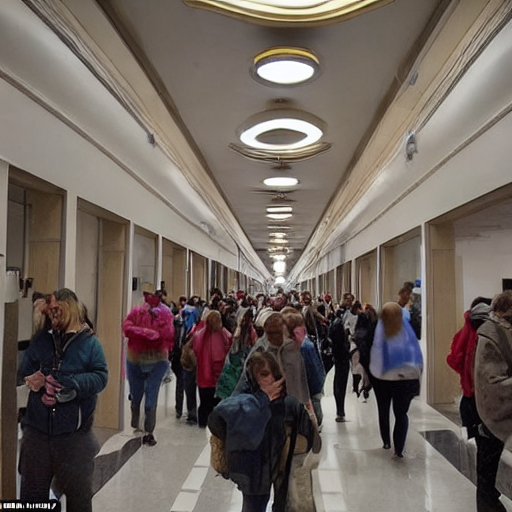

In [41]:

prompt = "a photo of crowds going towards a narrowing in the corridor"
pipe.enable_attention_slicing()
image = pipe(prompt).images[0]
image = [image]
grid = image_grid(image, rows=1, cols=1)
grid